In [183]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('fivethirtyeight') ## fivethirtyeight / dark_background  / bmh / ggplot / seaborn-deep / seaborn-pastel

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# to split the datasets
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer 

from sklearn.linear_model import LinearRegression

import scipy.stats as stats
from sklearn.preprocessing import KBinsDiscretizer

# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
import datetime
import missingno as msno

In [16]:
df = pd.read_csv(r'/Users/roni/Google Drive/DS-ML Project 2021/datasets/end of Data Integration/dataset_after_1.csv')
df.sample(5)

,Keypls,Rishuy_number,Rechecv_Companny,Manufacture_Year,Start_date,End_date,ID,Age,Gender,City,Meshlem_polisa_IND,NumInP,Tvia_number,Tvia_date,y
5448,3535,73005035,Ford,2003,2016-09-03,2017-09-03,300605686.0,16.0,Male,Haifa,0.0,4.0,NaN,NaN,0
7974,4751,73006251,Mazda,2016,2016-05-02,2017-05-02,300607213.0,60.0,Male,Haifa,0.0,5.0,NaN,NaN,0
7738,4636,73006136,NaN,2010,2016-05-02,2017-05-02,300605419.0,29.0,Male,Tel Aviv,1.0,1.0,NaN,NaN,0
7497,4523,73006023,Ford,2003,2016-05-02,2016-12-31,300603437.0,63.0,Male,Haifa,0.0,5.0,NaN,NaN,0
2807,2282,73003782,Fiat,2000,2016-01-01,2016-12-31,300608707.0,35.0,Male,Tel Aviv,1.0,1.0,1643524.0,2016-06-24,1


In [ ]:
############################################### data understanding - EDA ############################################
############################################### #################### ###########################################

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8508 entries, 0 to 8507
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keypls              8508 non-null   int64  
 1   Rishuy_number       8508 non-null   int64  
 2   Rechecv_Companny    8160 non-null   object 
 3   Manufacture_Year    8508 non-null   int64  
 4   Start_date          8508 non-null   object 
 5   End_date            8508 non-null   object 
 6   ID                  8000 non-null   float64
 7   Age                 8000 non-null   float64
 8   Gender              8000 non-null   object 
 9   City                8000 non-null   object 
 10  Meshlem_polisa_IND  8000 non-null   float64
 11  NumInP              8000 non-null   float64
 12  Tvia_number         1552 non-null   float64
 13  Tvia_date           1552 non-null   object 
 14  y                   8508 non-null   int64  
dtypes: float64(5), int64(4), object(6)
memory usage: 997.2+

In [18]:
df.columns

Index(['Keypls', 'Rishuy_number', 'Rechecv_Companny', 'Manufacture_Year',
       'Start_date', 'End_date', 'ID', 'Age', 'Gender', 'City',
       'Meshlem_polisa_IND', 'NumInP', 'Tvia_number', 'Tvia_date', 'y'],
      dtype='object')

In [19]:
# Describe all fetures 
dataset_all = df.describe(include='all')
dataset_all

,Keypls,Rishuy_number,Rechecv_Companny,Manufacture_Year,Start_date,End_date,ID,Age,Gender,City,Meshlem_polisa_IND,NumInP,Tvia_number,Tvia_date,y
count,8508.000000,8.508000e+03,8160,8508.000000,8508,8508,8.000000e+03,8000.000000,8000,8000,8000.000000,8000.000000,1.552000e+03,1552,8508.000000
unique,NaN,NaN,5,NaN,5,24,NaN,NaN,2,6,NaN,NaN,NaN,25,NaN
top,NaN,NaN,Ford,NaN,2016-01-01,2016-12-31,NaN,NaN,Female,Tel Aviv,NaN,NaN,NaN,2016-11-11,NaN
freq,NaN,NaN,2639,NaN,1725,1555,NaN,NaN,4077,2493,NaN,NaN,NaN,97,NaN
mean,2978.373883,7.300448e+07,NaN,1800.173249,NaN,NaN,3.006049e+08,45.120750,NaN,NaN,0.436625,2.995000,5.333764e+06,NaN,0.182417
std,1162.833960,1.162834e+03,NaN,611.876002,NaN,NaN,2.309545e+03,17.443264,NaN,NaN,0.495998,1.445938,4.815252e+06,NaN,0.386210
min,1000.000000,7.300250e+07,NaN,0.000000,NaN,NaN,3.006009e+08,16.000000,NaN,NaN,0.000000,1.000000,4.000000e+00,NaN,0.000000
25%,1965.000000,7.300346e+07,NaN,2002.000000,NaN,NaN,3.006029e+08,30.000000,NaN,NaN,0.000000,2.000000,9.029842e+05,NaN,0.000000
50%,2983.500000,7.300448e+07,NaN,2007.000000,NaN,NaN,3.006049e+08,45.000000,NaN,NaN,0.000000,3.000000,4.418404e+06,NaN,0.000000
75%,3975.000000,7.300548e+07,NaN,2012.000000,NaN,NaN,3.006069e+08,60.000000,NaN,NaN,1.000000,4.000000,9.036048e+06,NaN,0.000000


# Exploration of the target variable - Y

In [20]:
# Get frequency count of values in column (by categories)
frequency_y = df['y'].value_counts()
frequency_y

0    6956
1    1552
Name: y, dtype: int64

In [21]:
# Get percentage of values in column (by categories)
percentage_y = df['y'].value_counts(normalize =True)
percentage_y

0    0.817583
1    0.182417
Name: y, dtype: float64

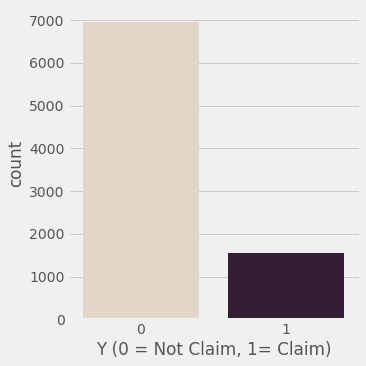

In [58]:
# y - Discrete variables category polt
sns.catplot(x="y", kind="count", palette="ch:.25", data = df);
plt.xlabel("Y (0 = Not Claim, 1= Claim)")
plt.show()

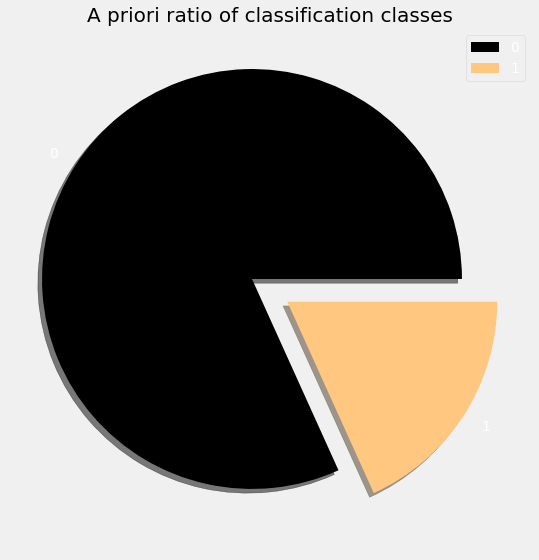

In [72]:
# plotting a pie chart to represent share of international repuatation

labels = ['0', '1']
sizes = df['y'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 2))
explode = [0.1, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('A priori ratio of classification classes',color= 'black', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
#pie_count(df, 'y')

As you can see, the Y feature is unbalanced - We will address this issue in the following steps

# Explanatory variables

### Numeric Features (Discrete & Continuous):

In [25]:
# Describe only numeric fetures - Count, mean, std, min, max, etc.
dataset_numeric = df.describe()
dataset_numeric

,Keypls,Rishuy_number,Manufacture_Year,ID,Age,Meshlem_polisa_IND,NumInP,Tvia_number,y
count,8508.000000,8.508000e+03,8508.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,1.552000e+03,8508.000000
mean,2978.373883,7.300448e+07,1800.173249,3.006049e+08,45.120750,0.436625,2.995000,5.333764e+06,0.182417
std,1162.833960,1.162834e+03,611.876002,2.309545e+03,17.443264,0.495998,1.445938,4.815252e+06,0.386210
min,1000.000000,7.300250e+07,0.000000,3.006009e+08,16.000000,0.000000,1.000000,4.000000e+00,0.000000
25%,1965.000000,7.300346e+07,2002.000000,3.006029e+08,30.000000,0.000000,2.000000,9.029842e+05,0.000000
50%,2983.500000,7.300448e+07,2007.000000,3.006049e+08,45.000000,0.000000,3.000000,4.418404e+06,0.000000
75%,3975.000000,7.300548e+07,2012.000000,3.006069e+08,60.000000,1.000000,4.000000,9.036048e+06,0.000000
max,5000.000000,7.300650e+07,2016.000000,3.006089e+08,75.000000,1.000000,8.000000,1.600000e+07,1.000000


In [24]:
# to get only the numeric variables - as is (with nulls)
dfnew = df.select_dtypes(include=np.number)
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8508 entries, 0 to 8507
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Keypls              8508 non-null   int64  
 1   Rishuy_number       8508 non-null   int64  
 2   Manufacture_Year    8508 non-null   int64  
 3   ID                  8000 non-null   float64
 4   Age                 8000 non-null   float64
 5   Meshlem_polisa_IND  8000 non-null   float64
 6   NumInP              8000 non-null   float64
 7   Tvia_number         1552 non-null   float64
 8   y                   8508 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 598.3 KB


#### The features that are relevant for generating general patterns are: **age, Manufacture_Year,** 

**Feature: Age**

<AxesSubplot:xlabel='Age', ylabel='Density'>

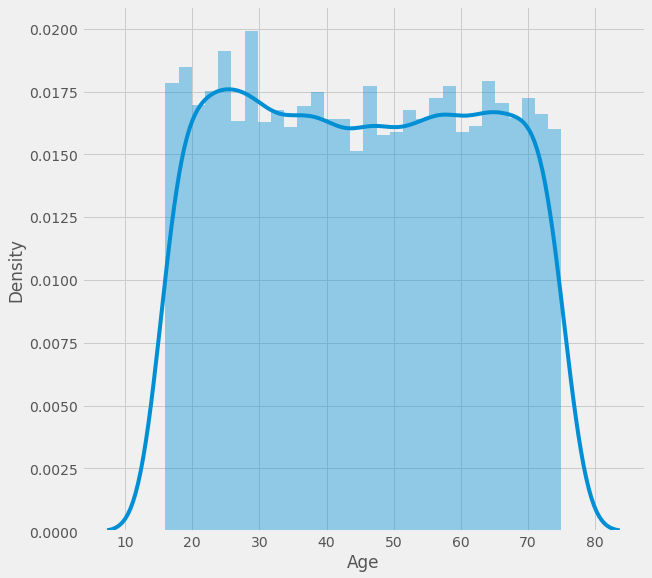

In [79]:
sns.distplot(df['Age'].dropna(),kde=True,bins=30)

In [75]:
# Get percentage of values in column (by categories)
# mean_age = df['Age'].mean()
# print("Age mean:",mean_age)
# median_age = df['Age'].median()
# print("Age median:",median_age)

**We can see that the Age feature has a kind of uniform distribution**

**Feature: Manufacture_Year**

<AxesSubplot:xlabel='Manufacture_Year', ylabel='Density'>

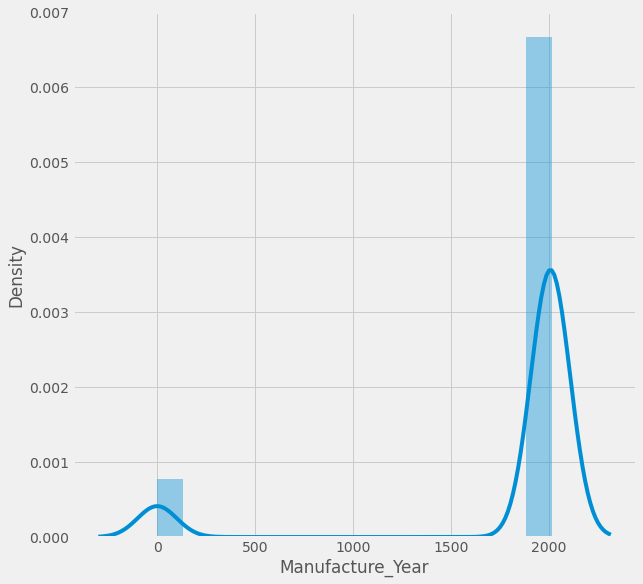

In [94]:
sns.distplot(df['Manufacture_Year'],kde=True,bins=15)

In [84]:
z= df.groupby("Manufacture_Year").size() # shows only the size
z

Manufacture_Year
0       881
2000    455
2001    404
2002    420
2003    467
2004    493
2005    392
2006    459
2007    398
2008    451
2009    403
2010    507
2011    482
2012    483
2013    436
2014    450
2015    446
2016    481
dtype: int64

In [ ]:
# we can see that we have 881 value with 0 (probably - "null") - let's drop the zeros and check the distribution

In [101]:
temp = df['Manufacture_Year'].to_frame(name='Manufacture_Year')
temp.drop(temp.loc[temp['Manufacture_Year']==0].index, inplace=True)
temp.groupby("Manufacture_Year").size()

Manufacture_Year
2000    455
2001    404
2002    420
2003    467
2004    493
2005    392
2006    459
2007    398
2008    451
2009    403
2010    507
2011    482
2012    483
2013    436
2014    450
2015    446
2016    481
dtype: int64

In [88]:
temp.describe()

,Manufacture_Year
count,7627.000000
mean,2008.112495
std,4.905339
min,2000.000000
25%,2004.000000
50%,2008.000000
75%,2012.000000
max,2016.000000


<AxesSubplot:xlabel='Manufacture_Year', ylabel='Density'>

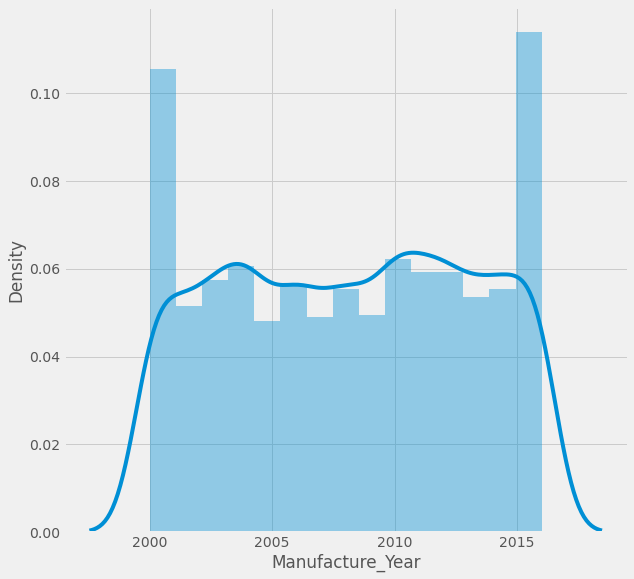

In [91]:
sns.distplot(temp['Manufacture_Year'],kde=True,bins=15)

**We can see that the Manufacture_Year has also kind of uniform distribution**

### Category features (Nominal, Ordinal):

In [102]:
# Describe only nun-numeric fetures 
dataset_nunnumeric = df.describe(include=['O'])
dataset_nunnumeric

,Rechecv_Companny,Start_date,End_date,Gender,City,Tvia_date
count,8160,8508,8508,8000,8000,1552
unique,5,5,24,2,6,25
top,Ford,2016-01-01,2016-12-31,Female,Tel Aviv,2016-11-11
freq,2639,1725,1555,4077,2493,97


#### The features that are relevant for generating general patterns are: **Rechecv_Companny, Gender, City** 

**Feature: Rechecv_Companny**

In [103]:
# Rechecv_Companny frequency 
frequency_Companny = df['Rechecv_Companny'].value_counts()
frequency_Companny

Ford     2639
Mazda    2588
Fiat     1749
BMW       758
Tesla     426
Name: Rechecv_Companny, dtype: int64

In [104]:
percentage_Companny = df['Rechecv_Companny'].value_counts(normalize =True)
percentage_Companny

Ford     0.323407
Mazda    0.317157
Fiat     0.214338
BMW      0.092892
Tesla    0.052206
Name: Rechecv_Companny, dtype: float64

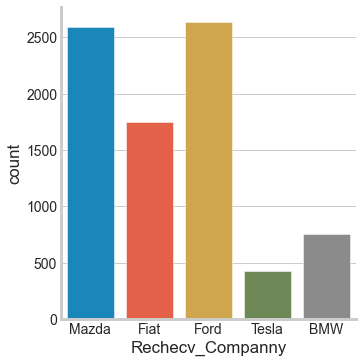

In [130]:
# Rechecv_Companny frequency polt
sns.catplot(x="Rechecv_Companny", kind="count", data = df);
plt.show()

**Feature: Gender**

In [110]:
# Gender frequency 
frequency_Gender = df['Gender'].value_counts()
frequency_Gender

Female    4077
Male      3923
Name: Gender, dtype: int64

In [111]:
percentage_Gender = df['Gender'].value_counts(normalize =True)
percentage_Gender

Female    0.509625
Male      0.490375
Name: Gender, dtype: float64

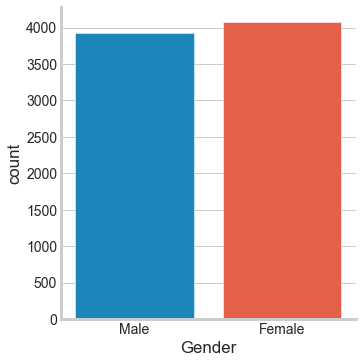

In [129]:
sns.catplot(x="Gender", kind="count", data = df);
plt.show()

**Feature: City**

In [113]:
# City frequency 
frequency_City = df['City'].value_counts()
frequency_City

Tel Aviv     2493
Jerusalem    2253
Haifa        1603
Ashdod        811
Tira          571
Dimona        269
Name: City, dtype: int64

In [114]:
percentage_City = df['City'].value_counts(normalize =True)
percentage_City

Tel Aviv     0.311625
Jerusalem    0.281625
Haifa        0.200375
Ashdod       0.101375
Tira         0.071375
Dimona       0.033625
Name: City, dtype: float64

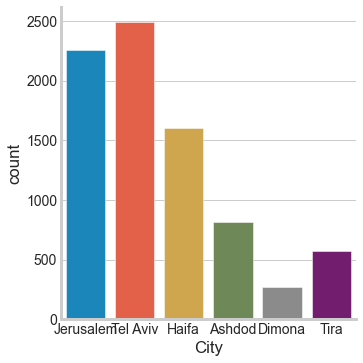

In [127]:
sns.catplot(x="City", kind="count", data = df);
plt.show()

# Explanatory variables by Traget - Y

In [ ]:
# calculate mean / avg or other on the predicted after groupby - by category features

In [ ]:
# count()  // mean 

In [118]:
# calculate mean / avg or other on the predicted after groupby - by category features
df[['Age', 'y']].groupby(['y'], as_index=False).mean().sort_values(by='y', ascending=False)

,y,Age
1,1,42.978723
0,0,45.597738


<AxesSubplot:xlabel='y', ylabel='count'>

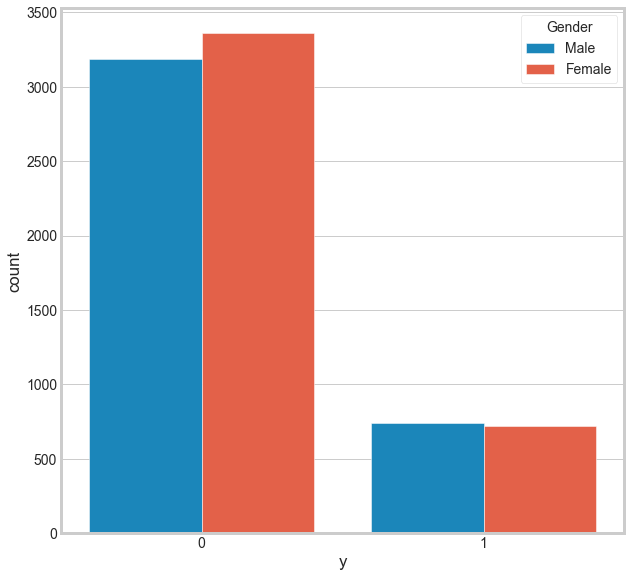

In [125]:
### Gender by y ###
sns.set_style('whitegrid')
sns.countplot(x='y',hue='Gender',data=df)

<AxesSubplot:xlabel='y', ylabel='count'>

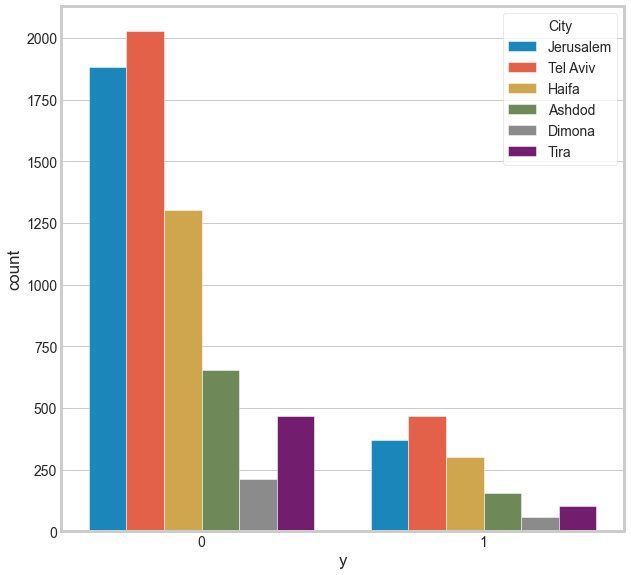

In [126]:
### City by y ###
sns.set_style('whitegrid')
sns.countplot(x='y',hue='City',data=df)

<AxesSubplot:xlabel='y', ylabel='count'>

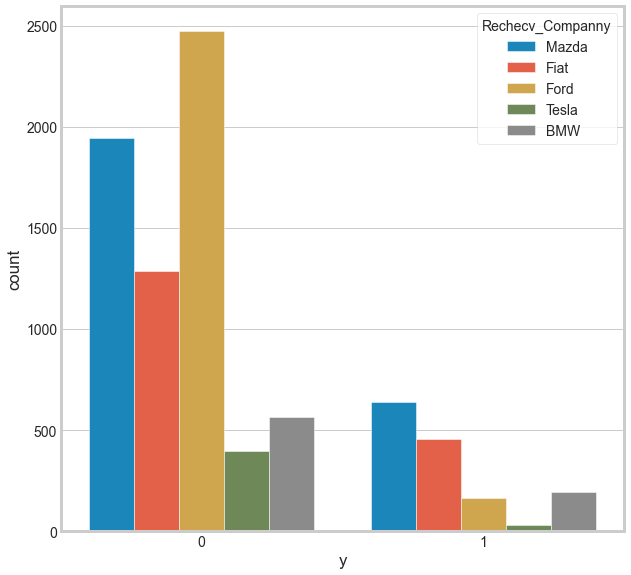

In [131]:
### Rechecv_Companny by y ###
sns.set_style('whitegrid')
sns.countplot(x='y',hue='Rechecv_Companny',data=df)

### Multivariate analysis:

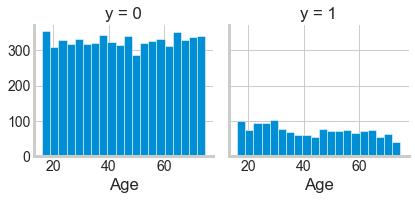

In [132]:
# hist of Age by y 
g = sns.FacetGrid(df, col='y')
g.map(plt.hist, 'Age', bins=20)

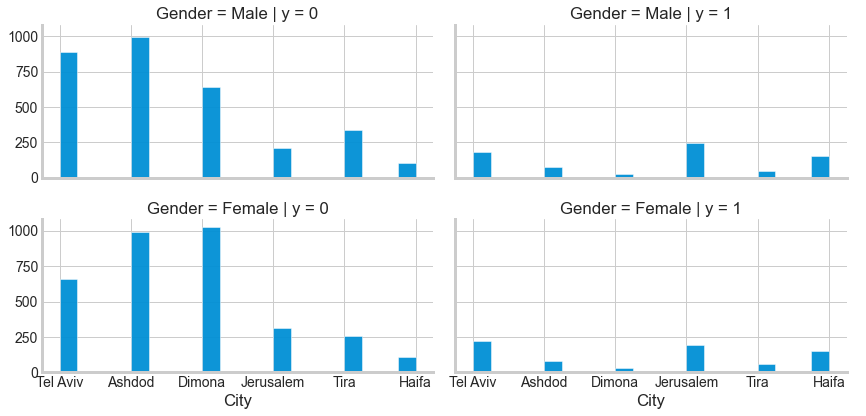

In [148]:
# plot of Gender and City by y
grid = sns.FacetGrid(df, col='y', row='Gender', size=3, aspect=2)
grid.map(plt.hist, 'City', alpha=.95, bins=20)
grid.add_legend();

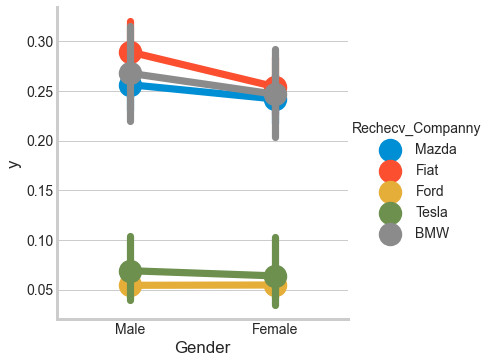

In [149]:
# Gender and Rechecv_Companny by y frequency
sns.catplot(x="Gender", y="y", hue="Rechecv_Companny", kind="point", data=df);

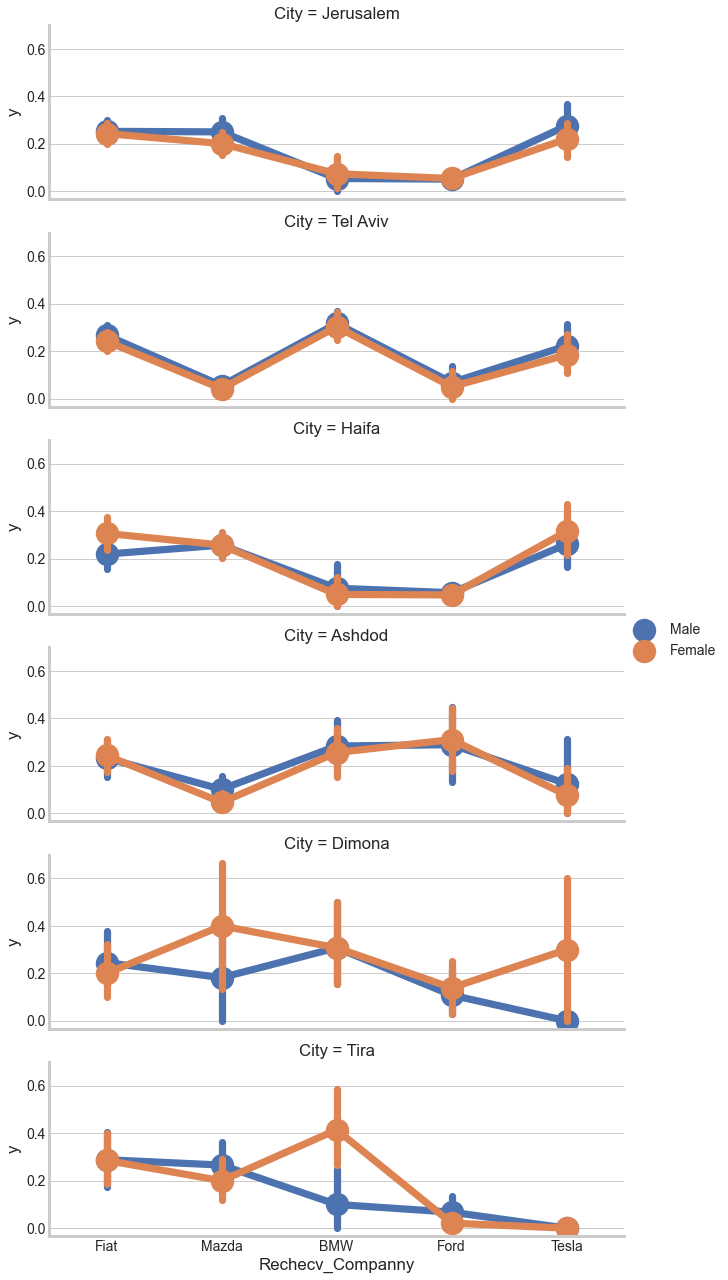

In [150]:
# City, Gender and Rechecv_Companny by y
grid = sns.FacetGrid(df, row='City', size=3, aspect=3)
grid.map(sns.pointplot, 'Rechecv_Companny', 'y', 'Gender', palette='deep')
grid.add_legend()

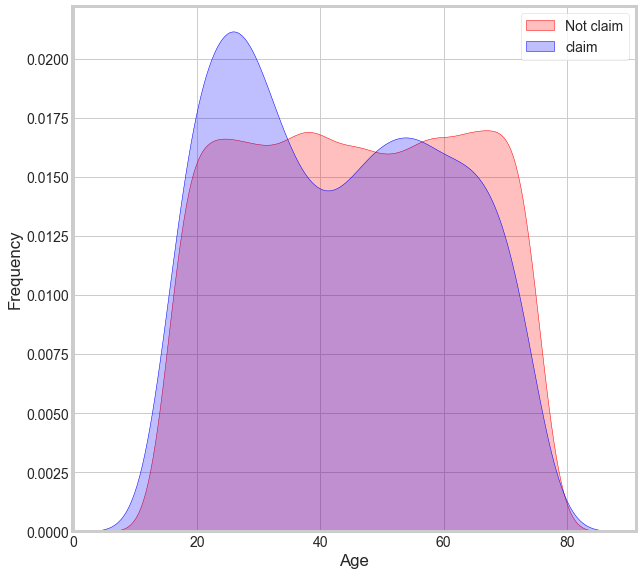

In [153]:
# Explore Age distibution by y
g = sns.kdeplot(df["Age"][(df["y"] == 0) & (df["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["Age"][(df["y"] == 1) & (df["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not claim","claim"])

## missing data:

In [ ]:
# first, we can see that Manufacture_Year == o is not valid. so we will change it to NaN

In [154]:
df['Manufacture_Year'] = df['Manufacture_Year'].replace(0, np.nan)
df['Manufacture_Year']

0          NaN
1          NaN
2       2006.0
3       2006.0
4       2000.0
         ...  
8503    2011.0
8504    2011.0
8505    2016.0
8506    2004.0
8507    2004.0
Name: Manufacture_Year, Length: 8508, dtype: float64

In [155]:
# let's chsck null values
df.isnull().sum()

Keypls                   0
Rishuy_number            0
Rechecv_Companny       348
Manufacture_Year       881
Start_date               0
End_date                 0
ID                     508
Age                    508
Gender                 508
City                   508
Meshlem_polisa_IND     508
NumInP                 508
Tvia_number           6956
Tvia_date             6956
y                        0
dtype: int64

In [202]:
# calculating the presentge of missing data 
featrue_null_sum_Age = df.isnull().sum()
featrue_values_count_Age = len(df)
print((featrue_null_sum_Age/featrue_values_count_Age)*100 )

Keypls                 0.000000
Rishuy_number          0.000000
Rechecv_Companny       4.090268
Manufacture_Year      10.354960
Start_date             0.000000
End_date               0.000000
ID                     5.970851
Age                    5.970851
Gender                 5.970851
City                   5.970851
Meshlem_polisa_IND     5.970851
NumInP                 5.970851
Tvia_number           81.758345
Tvia_date             81.758345
y                      0.000000
dtype: float64


In [ ]:
# Let's take a visual look to see if there is any pattern

<AxesSubplot:>

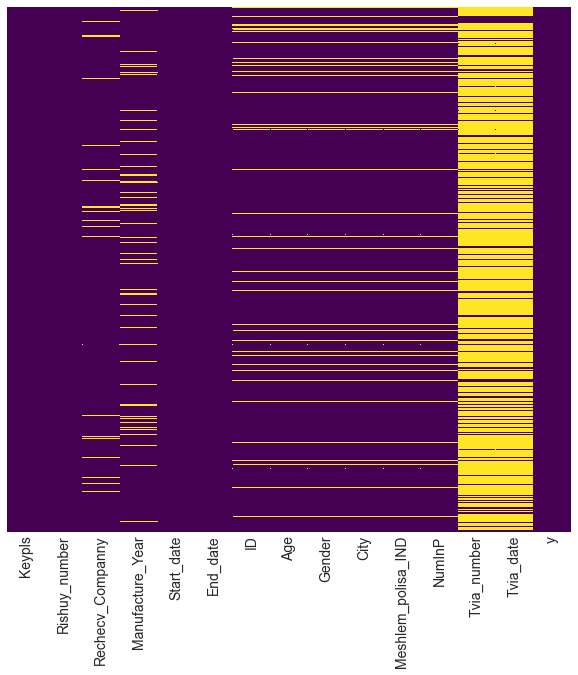

In [157]:
# Missing value by heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

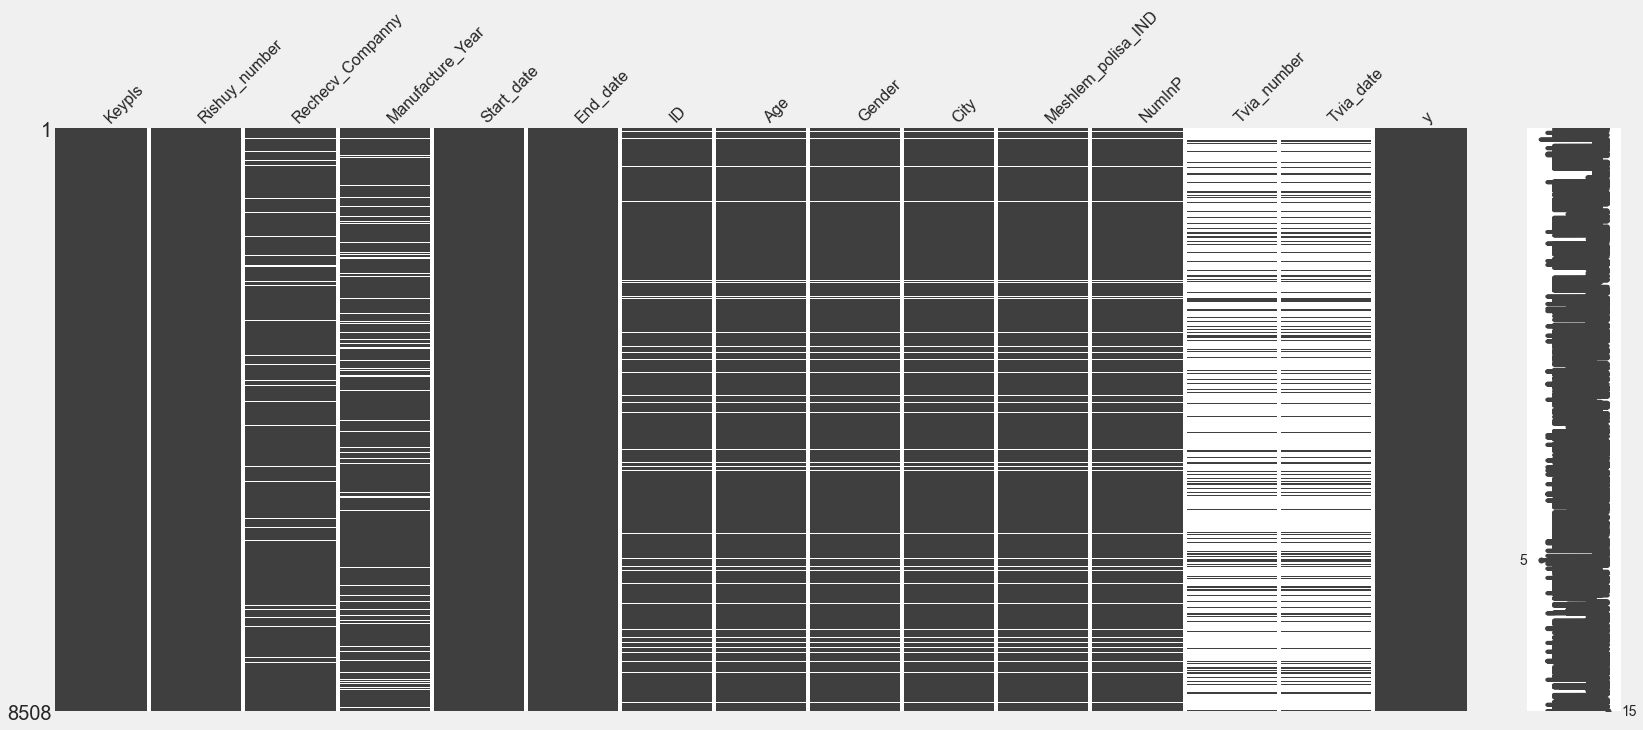

In [203]:
msno.matrix(df)

### Exploring claims by dates: 

In [191]:
# creating a copy of date features and removing the nans
df_dates = df[['Start_date','End_date','Tvia_date']]
df_dates.isna().sum()

Start_date       0
End_date         0
Tvia_date     6956
dtype: int64

In [192]:
df_dates.dropna(0, inplace=True)
df_dates.isna().sum()

Start_date    0
End_date      0
Tvia_date     0
dtype: int64

In [204]:
# first, we need to convert the types from object to DateTime
df_dates['Start_date'] = pd.to_datetime(df_dates['Start_date'])
df_dates['End_date'] =  pd.to_datetime(df_dates['End_date'])
df_dates['Tvia_date'] = pd.to_datetime(df_dates['Tvia_date'])

# Let's check the number of polisot by years, months and days -
# lets get the years months and days as features
df_dates['polisot_year'] = df_dates['Start_date'].dt.year
df_dates['polisot_month'] = df_dates['Start_date'].dt.month
df_dates['polisot_day'] = df_dates['Start_date'].dt.day
df_dates.sample(5)

,Start_date,End_date,Tvia_date,polisot_year,polisot_month,polisot_day
2940,2016-09-03,2017-09-03,2017-08-02,2016,9,3
8476,2016-04-08,2017-04-08,2016-09-30,2016,4,8
4686,2016-01-01,2016-12-31,2016-11-29,2016,1,1
669,2016-05-02,2017-05-02,2016-10-24,2016,5,2
4738,2016-11-11,2017-11-11,2016-11-11,2016,11,11


In [185]:
print("year",df_dates['polisot_year'].unique())
print("month",df_dates['polisot_month'].unique())
print("day",df_dates['polisot_day'].unique())

year [2016]
month [11  1  5  9  4]
day [11  1  2  3  8]


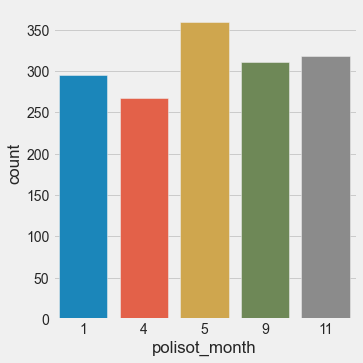

In [195]:
# Claims by months
sns.catplot(x="polisot_month", kind="count", data = df_dates);
plt.show()

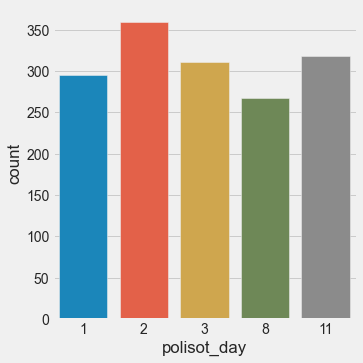

In [196]:
# Claims by days
sns.catplot(x="polisot_day", kind="count", data = df_dates);
plt.show()

In [179]:
# let's check if we have a polisa that is not valid (More than 365 days)
# we can see that the biggest gap is smaller than 365 - so we can conclude that all the polices are valid

In [197]:
diff = df_dates['Tvia_date'] - df_dates['Start_date']
diff.sort_values(ascending=False)

3048   333 days
7387   333 days
7260   333 days
7266   333 days
7267   333 days
         ...   
7215     0 days
2932     0 days
2902     0 days
2901     0 days
4        0 days
Length: 1552, dtype: timedelta64[ns]